# Visualising data

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from astropy.time import Time
from datetime import datetime
from sklearn.metrics import accuracy_score

In [34]:
icouk_data_file = '../Data/icouk_sighting_data_with_params.csv'
icop_data_file = '../Data/icop_ahmed_2020_sighting_data_with_params.csv'
alrefay_data_file = '../Data/alrefay_2018_sighting_data_with_params.csv'
#allawi_data_file = '../Data/schaefer_odeh_allawi_2022_sighting_data_with_params.csv' #Not currently using
yallop_data_file = '../Data/yallop_sighting_data_with_params.csv'

icouk_data = pd.read_csv(icouk_data_file)
icop_data = pd.read_csv(icop_data_file)
alrefay_data = pd.read_csv(alrefay_data_file)
yallop_data = pd.read_csv(yallop_data_file)

sources = [icouk_data,icop_data,alrefay_data,yallop_data]
source_names = ["ICOUK", "ICOP", "Alrefay", "Yallop"]
colours = ["red", "green", "yellow", "blue"]
data = pd.concat(sources)

print(data.shape[0])
#data = data[data["Cloud Level"] == 0]
data.head(5)

3555


,Index,Date,Latitude,Longitude,Moon Age,Sunset,Moonset,Lag,Moon Alt,Moon Az,...,W,W',q,q',Cloud Level,Seen,Method,Methods,Visibility,Source
0,0,2.457309e+06,53.95763,-1.08271,0.724,2.457309e+06,2.457309e+06,21.25000,1.07310,252.63669,...,0.13512,0.13516,-0.77237,-0.77235,1.0,Not_seen,Not_seen,Not_seen,0.0,ICOUK
1,1,2.457339e+06,53.95763,-1.08271,1.690,2.457339e+06,2.457339e+06,51.21667,2.93009,235.97254,...,0.27665,0.27688,-0.34076,-0.34062,0.5,Not_seen,Not_seen,Not_seen,0.0,ICOUK
2,2,2.457398e+06,53.95763,-1.08271,0.688,2.457398e+06,2.457398e+06,59.91667,3.36351,234.01106,...,0.15669,0.15684,-0.34782,-0.34772,0.5,Not_seen,Not_seen,Not_seen,0.0,ICOUK
3,3,2.457428e+06,53.58333,-2.43333,1.740,2.457428e+06,2.457428e+06,88.48333,5.96340,246.17414,...,0.51083,0.51175,0.34796,0.34848,1.0,Not_seen,Not_seen,Not_seen,0.0,ICOUK
4,4,2.457428e+06,52.63860,-1.13169,1.738,2.457428e+06,2.457428e+06,87.06667,6.02324,246.74294,...,0.50813,0.50905,0.35719,0.35771,0.0,Seen,Seen_eye,Seen_eye;Seen_binoculars;Seen_telescope;Seen_ccd,1.0,ICOUK


## Geographic distribution of sightings

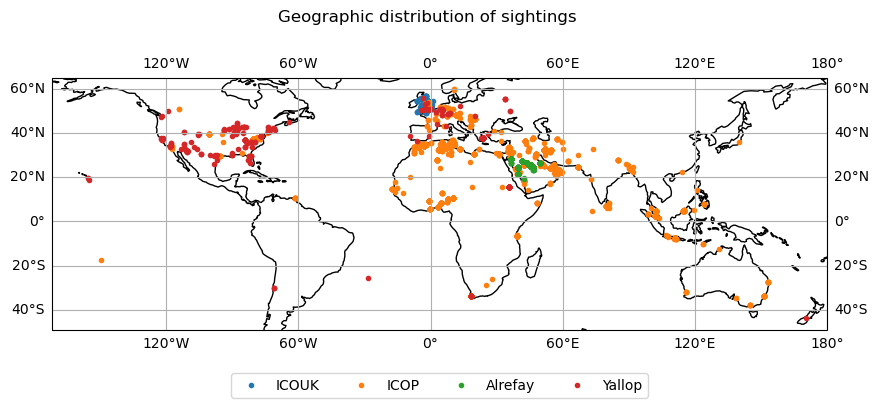

In [35]:
x = data["Longitude"]
y= data["Latitude"]
crs = ccrs.PlateCarree()
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111,projection=crs)
ax.coastlines()
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

for source, name in zip(sources,source_names):
    x = source["Longitude"]
    y = source["Latitude"]
    ax.plot(x,y,".",label=name)

fig.suptitle("Geographic distribution of sightings")
fig.legend(loc="lower center",ncol=4)
plt.show()

## Visibility

In [36]:
def plot_pie_distribution(column, title,labels=[]):

    fig = plt.figure(figsize=(14,3))

    pies = data[column].value_counts(sort=False)
    if len(labels) == 0:
        labels = data[column].unique()
    ax1 = fig.add_subplot(1,5,1)
    ax1.pie(pies, labels=labels, autopct='%1.0f%%')
    ax1.set_title("All sources")
    ax1.set_xlabel(f"N={data.shape[0]}")

    for i, source in enumerate(sources):
        pies = source[column].value_counts(sort=False)
        labels = source[column].unique()
        ax = fig.add_subplot(1,5,i+2)
        ax.pie(pies,labels=labels,autopct='%1.0f%%')
        ax.set_title(source_names[i])
        ax.set_xlabel(f"N={source.shape[0]}")

    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

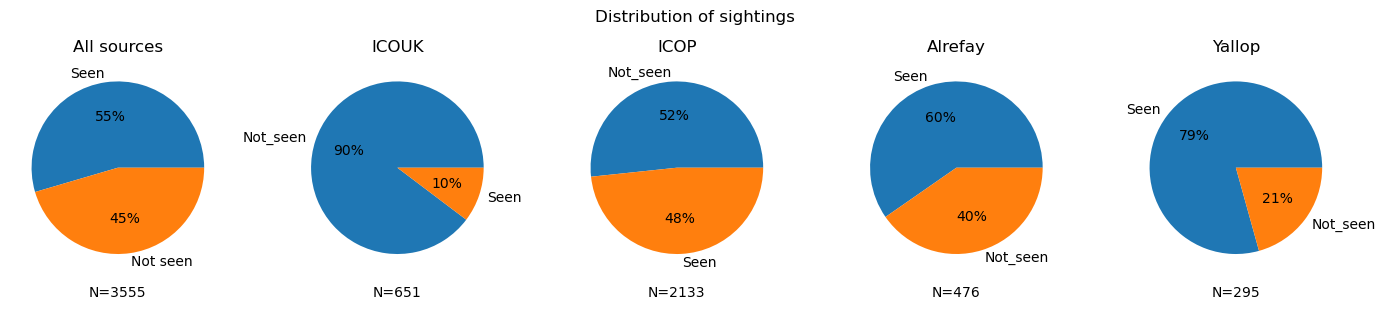

In [37]:
seen_labels=["Seen", "Not seen"]
plot_pie_distribution("Seen", "Distribution of sightings",seen_labels)

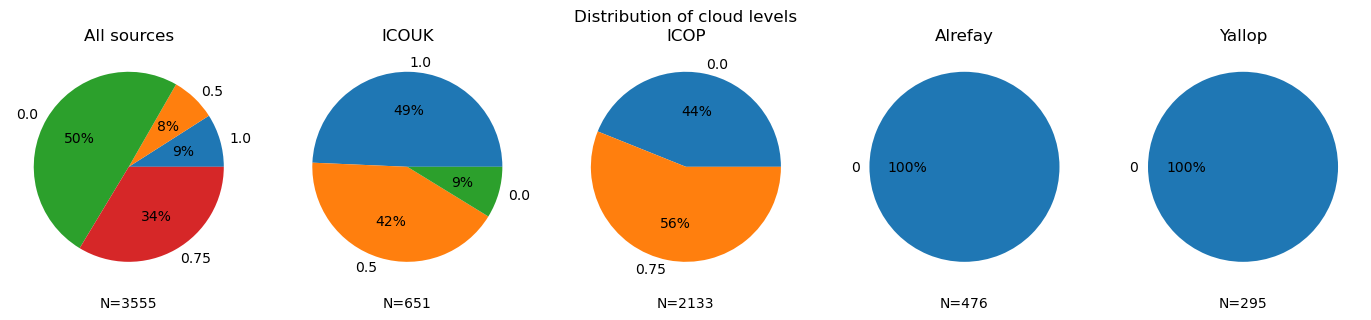

In [38]:
plot_pie_distribution("Cloud Level", "Distribution of cloud levels")

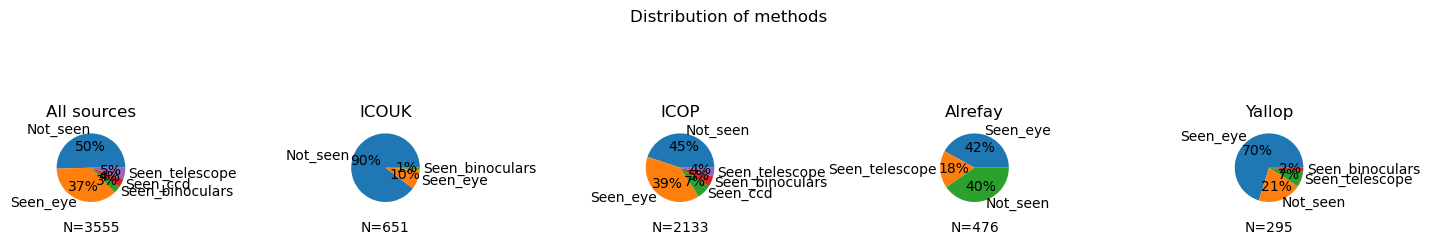

In [39]:
plot_pie_distribution("Method", "Distribution of methods")

/raid/scratch/npower/miniconda3/lib/python3.10/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


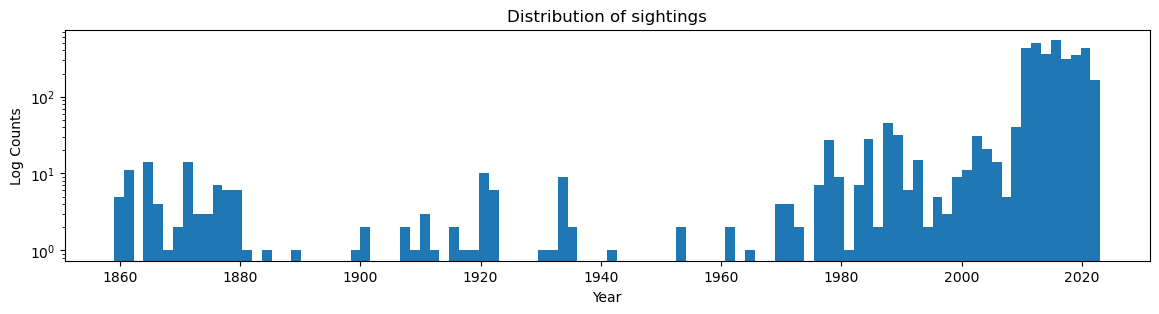

In [40]:
dates_list = [datetime.strptime(Time(date,format="jd").strftime('%Y-%M-%d'), '%Y-%M-%d').date() for date in data["Date"]]

fig = plt.figure(figsize=(14,3))
ax = fig.add_subplot(1,1,1)

ax.hist(dates_list,log=True,bins=100)
ax.set_title("Distribution of sightings")
ax.set_ylabel("Log Counts")
ax.set_xlabel("Year")
plt.show()

<Figure size 640x480 with 0 Axes>

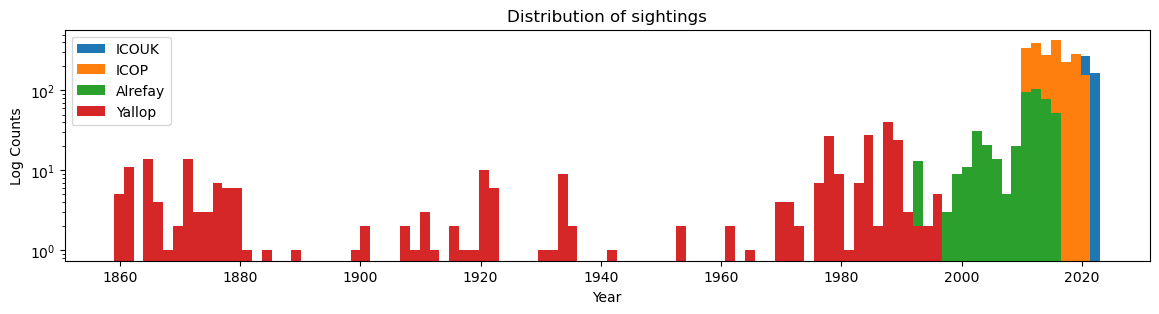

In [41]:
dates_list = [datetime.strptime(Time(date,format="jd").strftime('%Y-%M-%d'), '%Y-%M-%d').date() for date in data["Date"]]
#print(dates_list[1].timestamp())

(n, bins, patches) = plt.hist(dates_list, bins=100)
plt.clf()

fig = plt.figure(figsize=(14,3))
ax = fig.add_subplot(1,1,1)

for source, name in zip(sources,source_names):
    dates_list = [datetime.strptime(Time(date,format="jd").strftime('%Y-%M-%d'), '%Y-%M-%d').date() for date in source["Date"]]
    ax.hist(dates_list,bins,log=True,label=name)
ax.set_title("Distribution of sightings")
ax.set_ylabel("Log Counts")
ax.set_xlabel("Year")
ax.legend()
plt.show()

## Accuracy of Yallop

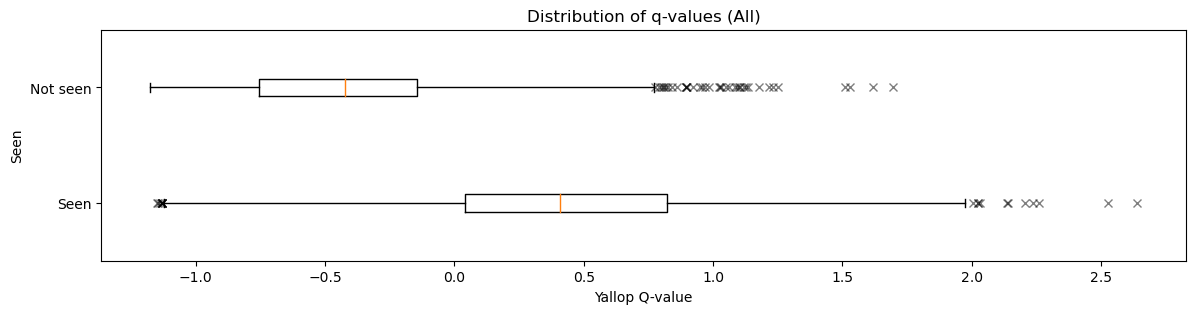

In [42]:
seen_q_values = data["q'"][data["Seen"]=="Seen"]
not_seen_q_values = data["q'"][data["Seen"]=="Not_seen"]

fig = plt.figure(figsize=(14,3))
ax = fig.add_subplot(1,1,1)

bp = ax.boxplot([seen_q_values,not_seen_q_values],vert = 0)

for flier in bp['fliers']:
    flier.set(marker ='x',
              color ='black',
              alpha = 0.5)
    
ax.set_title("Distribution of q-values (All)")
ax.set_ylabel("Seen")
ax.set_xlabel("Yallop Q-value")
ax.set_yticklabels(['Seen', 'Not seen'])
plt.show()

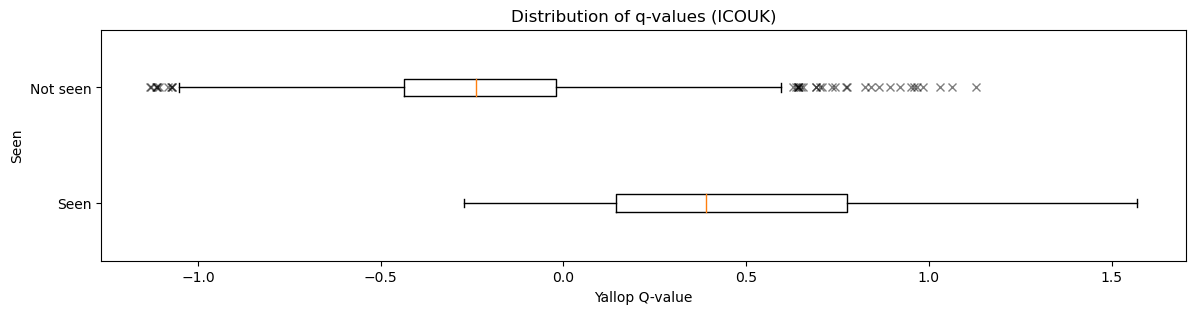

In [43]:
seen_q_values = icouk_data["q'"][icouk_data["Seen"]=="Seen"]
not_seen_q_values = icouk_data["q'"][icouk_data["Seen"]=="Not_seen"]

fig = plt.figure(figsize=(14,3))
ax = fig.add_subplot(1,1,1)

bp = ax.boxplot([seen_q_values,not_seen_q_values],vert = 0)

for flier in bp['fliers']:
    flier.set(marker ='x',
              color ='black',
              alpha = 0.5)
    
ax.set_title("Distribution of q-values (ICOUK)")
ax.set_ylabel("Seen")
ax.set_xlabel("Yallop Q-value")
ax.set_yticklabels(['Seen', 'Not seen'])
plt.show()

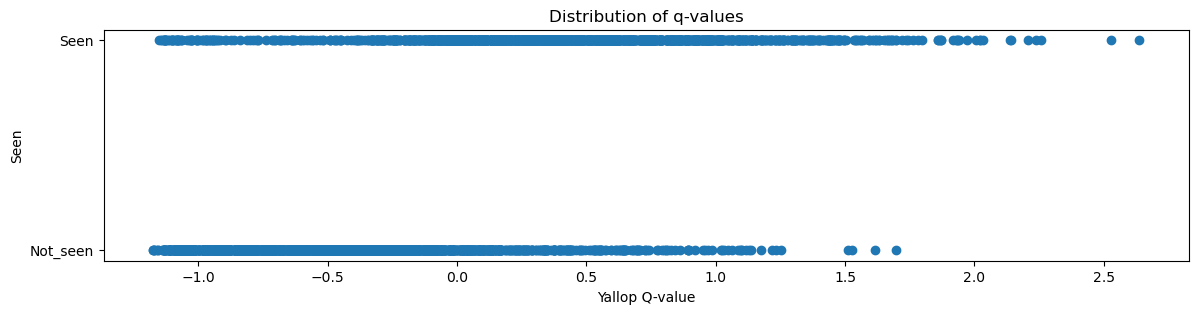

In [44]:
seen_q_values = data["q'"][data["Seen"]=="Seen"]
not_seen_q_values = data["q'"][data["Seen"]=="Not_seen"]

fig = plt.figure(figsize=(14,3))
ax = fig.add_subplot(1,1,1)

bp = ax.scatter(data["q'"],data["Seen"])

ax.set_title("Distribution of q-values")
ax.set_ylabel("Seen")
ax.set_xlabel("Yallop Q-value")
#ax.set_yticklabels(['Seen', 'Not seen'])
plt.show()

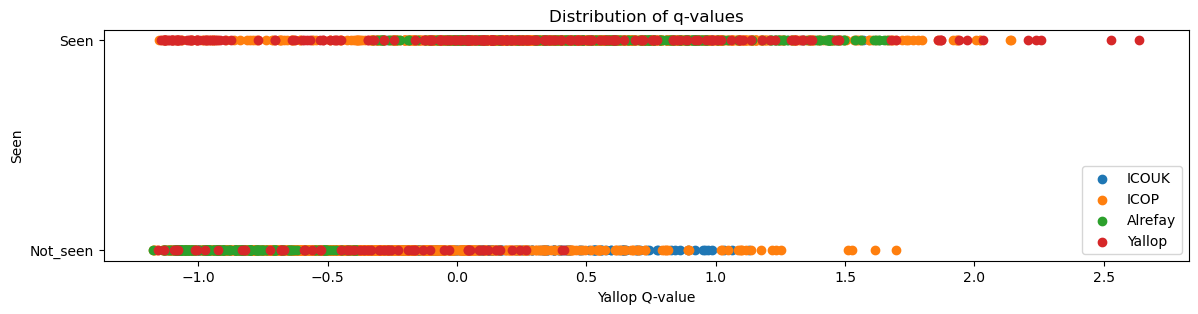

In [45]:
seen_q_values = data["q'"][data["Seen"]=="Seen"]
not_seen_q_values = data["q'"][data["Seen"]=="Not_seen"]

fig = plt.figure(figsize=(14,3))
ax = fig.add_subplot(1,1,1)

for source, name in zip(sources,source_names):
    ax.scatter(source["q'"],source["Seen"],label=name)

ax.set_title("Distribution of q-values")
ax.set_ylabel("Seen")
ax.set_xlabel("Yallop Q-value")
ax.legend()
plt.show()

In [51]:
below_danjon_data = data[np.logical_and(data["Seen"]=="Seen",-0.293>=data["q'"])]
print(below_danjon_data.shape[0])

for source, name in zip(sources,source_names):
    no_below_danjon = source[np.logical_and(source['Seen']=='Seen', -0.293>=source["q'"])].shape[0]
    print(f"{name}: {no_below_danjon}")

# interesting_data = allawi_data[np.logical_and(allawi_data["Seen"]=="Seen",-0.293>=allawi_data["q'"])]
# interesting_data = interesting_data.drop(["Methods","Visibility","Source","Sunset","Moonset","Illumination","Cloud Level","W","q","Moon-Earth Dist","Sun-Moon Dist"],axis=1)
# interesting_data["Date"] = Time(interesting_data["Date"],format="jd").to_datetime()
# interesting_data.head(10)

144
ICOUK: 0
ICOP: 80
Alrefay: 3
Yallop: 61


In [47]:

morning_data = data[(data["Date"]-data["Date"].astype(int))>0.5]
evening_data = data[(data["Date"]-data["Date"].astype(int))<0.5]

print(f"Total: Morning: {morning_data.shape[0]} Evening: {evening_data.shape[0]}")

for source, name in zip(sources,source_names):
    smorning_data = source[(source["Date"]-source["Date"].astype(int))>0.5].shape[0]
    sevening_data = source[(source["Date"]-source["Date"].astype(int))<0.5].shape[0]
    print(f"{name}: Morning: {smorning_data} Evening: {sevening_data}")

# amorning_data = allawi_data[(allawi_data["Date"]-allawi_data["Date"].astype(int))>0.5]

# amorning_data["Date"] = Time(amorning_data["Date"],format="jd").to_datetime()
# #morning_data.to_csv('morning_data.csv')
# amorning_data = amorning_data.drop(["Index","Methods","Visibility","Sunset","Moonset","Illumination","Cloud Level","W","q","Moon-Earth Dist","Sun-Moon Dist"],axis=1)
# amorning_data.head(5)

Total: Morning: 448 Evening: 3107
ICOUK: Morning: 0 Evening: 651
ICOP: Morning: 353 Evening: 1780
Alrefay: Morning: 0 Evening: 476
Yallop: Morning: 95 Evening: 200


In [48]:

morning_data = data[data["Moon Age"]>20]
evening_data = data[data["Moon Age"]<=20]

print(f"Total: {data.shape[0]} Morning: {morning_data.shape[0]} Evening: {evening_data.shape[0]}")

for source, name in zip(sources,source_names):
    smorning_data = source[source["Moon Age"]>20].shape[0]
    sevening_data = source[source["Moon Age"]<=20].shape[0]
    print(f"{name}: Morning: {smorning_data} Evening: {sevening_data}")

# amorning_data = allawi_data[(allawi_data["Date"]-allawi_data["Date"].astype(int))>0.5]

# amorning_data["Date"] = Time(amorning_data["Date"],format="jd").to_datetime()
# #morning_data.to_csv('morning_data.csv')
# amorning_data = amorning_data.drop(["Index","Methods","Visibility","Sunset","Moonset","Illumination","Cloud Level","W","q","Moon-Earth Dist","Sun-Moon Dist"],axis=1)
# amorning_data.head(5)

Total: 3555 Morning: 117 Evening: 3438
ICOUK: Morning: 0 Evening: 651
ICOP: Morning: 37 Evening: 2096
Alrefay: Morning: 3 Evening: 473
Yallop: Morning: 77 Evening: 218


In [49]:
q_values = data["q'"].astype("float")
quantified_q = np.empty((q_values.size),dtype=str)

quantified_q[q_values > 0.216] = "Seen" #A Easily visible
quantified_q[np.logical_and(0.216 >= q_values, q_values > -0.014)] = "Seen" #B Visible under perfect conditions
quantified_q[np.logical_and(-0.014 >= q_values, q_values > -0.160)] = "Seen" #C May need optical aid to find crescent
quantified_q[np.logical_and(-0.160 >= q_values, q_values > -0.232)] = "Not_seen" #D Will need optical aid to find crescent
quantified_q[np.logical_and(-0.232 >= q_values, q_values > -0.293)] = "Not_seen" #E Not visible with a telescope ARCL ≤ 8·5°
quantified_q[-0.293 >= q_values] = "Not_seen" #F Not visible, below Danjon limit, ARCL ≤ 8°
print(f"Yallop Accuracy (Seen/Not_seen): {accuracy_score(data['Seen'].str[0], quantified_q):.1%}")

Yallop Accuracy (Seen/Not_seen): 80.1%


In [50]:
q_values = data["q'"].astype("float")
quantified_q = np.empty((q_values.size),dtype=str)

data["Method"] = data["Method"].replace("Seen_binoculars", "Aid")
data["Method"] = data["Method"].replace("Seen_telescope", "Aid")
data["Method"] = data["Method"].replace("Seen_ccd", "Aid")

quantified_q[q_values > 0.216] = "Seen" #A Easily visible
quantified_q[np.logical_and(0.216 >= q_values, q_values > -0.014)] = "Seen" #B Visible under perfect conditions
quantified_q[np.logical_and(-0.014 >= q_values, q_values > -0.160)] = "Seen" #C May need optical aid to find crescent
quantified_q[np.logical_and(-0.160 >= q_values, q_values > -0.232)] = "Aid" #D Will need optical aid to find crescent
quantified_q[np.logical_and(-0.232 >= q_values, q_values > -0.293)] = "Not_seen" #E Not visible with a telescope ARCL ≤ 8·5°
quantified_q[-0.293 >= q_values] = "Not_seen" #F Not visible, below Danjon limit, ARCL ≤ 8°
print(f"Yallop Accuracy (Seen/With aid/Not_seen): {accuracy_score(data['Seen'].str[0], quantified_q):.1%}")

Yallop Accuracy (Seen/With aid/Not_seen): 76.4%
